In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline


In [64]:
df= pd.read_csv("C:\\Users\\user\\Desktop\\Lessons\\Visualization\\weather-check.csv")

In [65]:
df.head(10)


,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
5,3886937140,Yes,A specific website or app (please provide the ...,AccuWeather App,Somewhat likely,18 - 29,Male,"$100,000 to $124,999",West South Central
6,3886923931,Yes,The Weather Channel,-,Very unlikely,30 - 44,Male,"$25,000 to $49,999",West South Central
7,3886913587,Yes,-,-,-,-,-,-,-
8,3886889048,Yes,The Weather Channel,-,Very likely,30 - 44,Male,Prefer not to answer,Pacific
9,3886848806,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$150,000 to $174,999",West North Central


In [71]:

data= df.groupby([ 'US Region', 'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?']).size().reset_index(name='Count')

In [68]:
data

,US Region,"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Count
0,-,-,11
1,-,Somewhat likely,7
2,-,Somewhat unlikely,2
3,-,Very likely,4
4,-,Very unlikely,7
5,East North Central,Somewhat likely,38
6,East North Central,Somewhat unlikely,10
7,East North Central,Very likely,63
8,East North Central,Very unlikely,30
9,East South Central,Somewhat likely,11


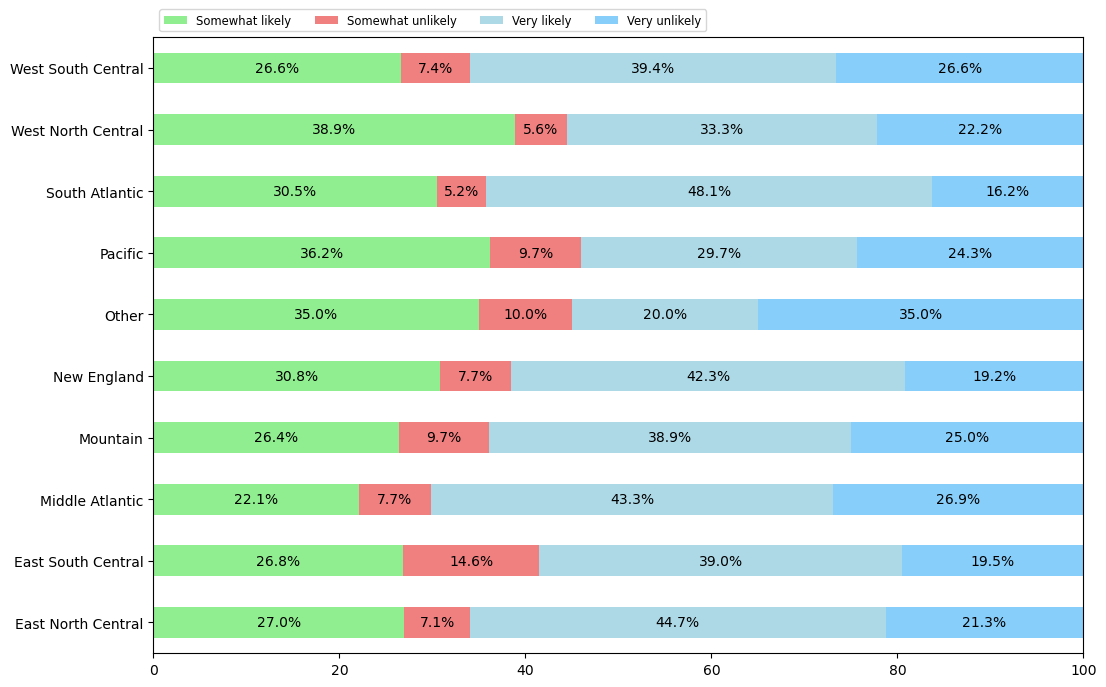

In [115]:
data = {
    "US Region": ["Other", "Other", "Other", "Other", "Other", "East North Central", "East North Central", "East North Central", "East North Central", "East South Central", "East South Central", "East South Central", "East South Central", "Middle Atlantic", "Middle Atlantic", "Middle Atlantic", "Middle Atlantic", "Mountain", "Mountain", "Mountain", "Mountain", "New England", "New England", "New England", "New England", "Pacific", "Pacific", "Pacific", "Pacific", "South Atlantic", "South Atlantic", "South Atlantic", "South Atlantic", "West North Central", "West North Central", "West North Central", "West North Central", "West South Central", "West South Central", "West South Central", "West South Central"],
    "Likelihood": ["-", "Somewhat likely", "Somewhat unlikely", "Very likely", "Very unlikely", "Somewhat likely", "Somewhat unlikely", "Very likely", "Very unlikely", "Somewhat likely", "Somewhat unlikely", "Very likely", "Very unlikely", "Somewhat likely", "Somewhat unlikely", "Very likely", "Very unlikely", "Somewhat likely", "Somewhat unlikely", "Very likely", "Very unlikely", "Somewhat likely", "Somewhat unlikely", "Very likely", "Very unlikely", "Somewhat likely", "Somewhat unlikely", "Very likely", "Very unlikely", "Somewhat likely", "Somewhat unlikely", "Very likely", "Very unlikely", "Somewhat likely", "Somewhat unlikely", "Very likely", "Very unlikely", "Somewhat likely", "Somewhat unlikely", "Very likely", "Very unlikely"],
    "Count": [11, 7, 2, 4, 7, 38, 10, 63, 30, 11, 6, 16, 8, 23, 8, 45, 28, 19, 7, 28, 18, 16, 4, 22, 10, 67, 18, 55, 45, 47, 8, 74, 25, 21, 3, 18, 12, 25, 7, 37, 25]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Filter out '-' values from the Likelihood column
df_filtered = df[df['Likelihood'] != '-']

# Pivot the DataFrame to get counts for each likelihood in each region
pivot_df = df_filtered.pivot_table(index='US Region', columns='Likelihood', values='Count', fill_value=0)

# Normalize the counts to percentages for each row
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Define colors for each likelihood category
color_mapping = {
    'Very likely': 'lightblue',
    'Somewhat likely': 'lightgreen',
    'Somewhat unlikely': 'lightcoral',
    'Very unlikely': 'lightskyblue'
}

# Plotting
ax = pivot_df_percent.plot(kind='barh', stacked=True, figsize=(12, 8), color=[color_mapping[col] for col in pivot_df_percent.columns])
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend('')
plt.xlim(0, 100)  # Set x-axis limit from 0 to 100 for percentage

# Annotate each segment with its percentage value
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.1f}%'.format(width), ha='center', va='center')

# Create a legend for the color mapping
legend_handles = [plt.Rectangle((0,0),1,1, color=color_mapping[col], label=col) for col in pivot_df_percent.columns]

plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.show()

## Homework 2


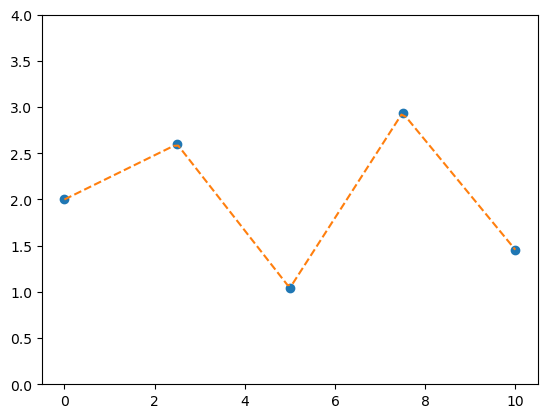

In [124]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, 5)
y = np.sin(x) + 2  # Adjusting y to start from 2

f = interp1d(x, y, kind='linear')
xnew = np.linspace(0, 10, 100)
ynew = f(xnew)

plt.plot(x, y, 'o', xnew, ynew, '--')
plt.ylim(0, 4)  # Adjusting y-axis limits to show the starting value
plt.show()